In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
from src.utils.utils import sentiment_postprocessor, sentiment_preprocessor
RANDOM_STATE=42
def sentiment_preprocessor(label):
    if label == "positive":
        return "позитив"
    elif label == "neautral" or label== "neutral":
        return "нейтральность"
    elif label == "negative":
        return "негатив"

In [2]:
kaggle_path = "data/kaggle-ru-news/train.json"
column_names = ["text", "label"]

kaggle = pd.read_json(kaggle_path).drop("id", axis=1)
kaggle.columns = column_names

kaggle["text"] = kaggle["text"].apply(
    lambda x: x.replace("\n", "").replace("\t", "")
)



In [3]:
pd.options.display.max_colwidth = 80

In [4]:
kaggle.sample(5)

,text,label
5290,"""Городом-героем"", сдавшим больше всего автомобилей, стал Шымкент – 661 автом...",positive
4199,Гражданам предложат рискнуть своими пенсиями В ЕНПФ поддерживают возможность...,neutral
36,"Ян Младек, Фото: Филип Яндоурек, Чешское радио Министр промышленности и торг...",neutral
3626,"КТЖ необходимо срочно обновить железнодорожный парк, считает депутат Сакен У...",negative
6303,Ежеквартально граждане Казахстана покупают около 10 тысяч новых автомобилей ...,positive


In [5]:
kaggle["Length words"] = kaggle["text"].apply(lambda x: len(x.split()))
kaggle["Length"] = kaggle["text"].apply(len)

In [12]:
len(kaggle)

8263

In [6]:
kaggle["Length words"].mean()

506.7170519181895

In [7]:
kaggle["Length"].mean()

3888.608858768002

In [8]:
kaggle["label"] = kaggle["label"].apply(sentiment_preprocessor)

In [9]:
kaggle.groupby("label").sample(2)

,text,label,Length words,Length
5611,Проверку деятельности Единого накопительного пенсионного фонда (ЕНПФ) провод...,негатив,197,1593
5147,7 ноября в 5 часов 18 минут на станции Саз участка Алматы-Ота в Алматинской ...,негатив,79,582
6841,"30.01.2017, 16:01Казахстанские банки продолжат процесс укрупнения, считает г...",нейтральность,42,382
3917,Астана. 2 декабря. Kazakhstan Today - Инфляция в Республике Казахстан за янв...,нейтральность,318,2264
6517,"Как отметил Елбасы, агропромышленный комплекс имеет перспективное будущее. ""...",позитив,230,1874
6077,АСТАНА. 8 ноября. КАЗИНФОРМ - Казинформ предлагает читателям информационный ...,позитив,4018,35047


<AxesSubplot: xlabel='Количество элементов', ylabel='Класс'>

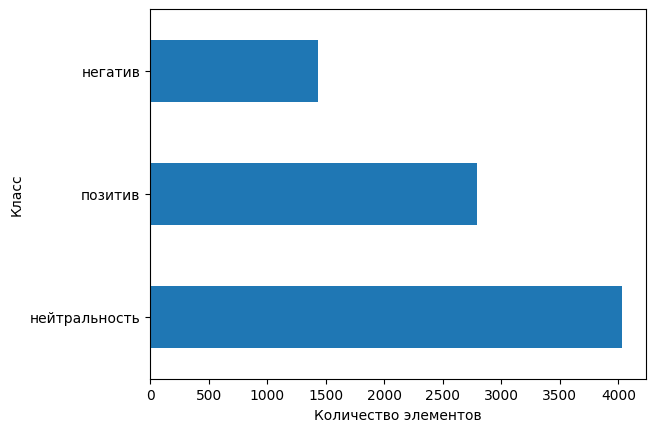

In [10]:
kaggle["label"].value_counts().plot.barh(xlabel="Количество элементов", ylabel="Класс")

In [11]:
size = kaggle.shape[0]
val_test_size = int(size * 0.1)

kaggle_train_val, kaggle_test = train_test_split(
    kaggle, test_size=val_test_size, shuffle=True, random_state=RANDOM_STATE
)

kaggle_train, kaggle_val = train_test_split(
    kaggle_train_val,
    test_size=val_test_size,
    shuffle=True,
    random_state=RANDOM_STATE,
)

print(
    f"Loaded RuReviews: train {kaggle_train.shape[0]},",
    f"val {kaggle_val.shape[0]},",
    f"test {kaggle_test.shape[0]}",
)

Loaded RuReviews: train 6611, val 826, test 826
